> *Proyecto basado en este repositorio: https://github.com/rasho190/christmas_3d_tree*

In [1]:
from matplotlib import animation
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

import numpy as np
from IPython.display import HTML

### Paso 1: Definir partes del árbol

#### Tronco Inferior

In [2]:
# Vértices del Tronco de Pirámide Inferior
vertices_inferior = [[3, 3, 0],    # Vértice 1
                     [3, -3, 0],   # Vértice 2
                     [-3, -3, 0],  # Vértice 3
                     [-3, 3, 0],   # Vértice 4
                     [2, 2, 1],   # Vértice 5
                     [2, -2, 1],  # Vértice 6
                     [-2, -2, 1], # Vértice 7
                     [-2, 2, 1]]  # Vértice 8

In [3]:
# Definir las caras del Tronco de la Pirámide central
caras_inferiores = [
    [vertices_inferior[0], vertices_inferior[1], vertices_inferior[2], vertices_inferior[3]],  # Base
    [vertices_inferior[0], vertices_inferior[1], vertices_inferior[4], vertices_inferior[5]],  # Cara Lateral 1
    [vertices_inferior[1], vertices_inferior[2], vertices_inferior[5], vertices_inferior[6]],  # Cara Lateral 2
    [vertices_inferior[2], vertices_inferior[3], vertices_inferior[6], vertices_inferior[7]],  # Cara Lateral 3
    [vertices_inferior[0], vertices_inferior[3], vertices_inferior[4], vertices_inferior[7]],  # Cara Lateral 4
]

#### Tronco Medio

In [4]:
# Vértices del Tronco de Pirámide Inferior
vertices_medio = [[2, 2, 1],    # Vértice 1
                  [2, -2, 1],   # Vértice 2
                  [-2, -2, 1],  # Vértice 3
                  [-2, 2, 1],   # Vértice 4
                  [1, 1, 2],   # Vértice 5
                  [1, -1, 2],  # Vértice 6
                  [-1, -1, 2], # Vértice 7
                  [-1, 1, 2]]  # Vértice 8

In [5]:
# Definir las caras del Tronco de la Pirámide Mediana
caras_medias = [
#     [vertices_medio[0], vertices_medio[1], vertices_medio[2], vertices_medio[3]],  # Base
    [vertices_medio[0], vertices_medio[1], vertices_medio[4], vertices_medio[5]],  # Cara Lateral 1
    [vertices_medio[1], vertices_medio[2], vertices_medio[5], vertices_medio[6]],  # Cara Lateral 2
    [vertices_medio[2], vertices_medio[3], vertices_medio[6], vertices_medio[7]],  # Cara Lateral 3
    [vertices_medio[0], vertices_medio[3], vertices_medio[4], vertices_medio[7]],  # Cara Lateral 4
]

#### Punta del Árbol

In [6]:
# Vértices del Tronco de Pirámide Superior
vertices_superior = [[1, 1, 2],    # Vértice 1
                     [1, -1, 2],   # Vértice 2
                     [-1, -1, 2],  # Vértice 3
                     [-1, 1, 2],   # Vértice 4
                     [0, 0, 3]]    # Vértice 5 (Punta)

In [7]:
# Definir las caras del Tronco de la Pirámide Superior
caras_superiores = [
#     [vertices_superior[0], vertices_superior[1], vertices_superior[2], vertices_superior[3]],  # Base
    [vertices_superior[0], vertices_superior[1], vertices_superior[4]],                        # Cara Lateral 1
    [vertices_superior[1], vertices_superior[2], vertices_superior[4]],                        # Cara Lateral 2
    [vertices_superior[2], vertices_superior[3], vertices_superior[4]],                        # Cara Lateral 3
    [vertices_superior[0], vertices_superior[3], vertices_superior[4]],                        # Cara Lateral 4
]

#### Estrella

In [8]:
# Vértices del Pico Inferior de la Estrella
vertices_estrella_inferior = [[0.25, -0.25, 3.25],   # Vértice 1
                              [-0.25, -0.25, 3.25],  # Vértice 2
                              [-0.25, 0.25, 3.25],   # Vértice 3
                              [0.25, 0.25, 3.25],    # Vértice 4
                              [0, 0, 3]             # Vértice 5 (Punta)
]

In [9]:
# Definir las caras del Tronco de la Pirámide Inferior
estrella_inferior = [
    [vertices_estrella_inferior[0], vertices_estrella_inferior[1], vertices_estrella_inferior[2], vertices_estrella_inferior[3]],  # Base
    [vertices_estrella_inferior[0], vertices_estrella_inferior[1], vertices_estrella_inferior[4]], # Cara Lateral 1
    [vertices_estrella_inferior[1], vertices_estrella_inferior[2], vertices_estrella_inferior[4]], # Cara Lateral 2
    [vertices_estrella_inferior[2], vertices_estrella_inferior[3], vertices_estrella_inferior[4]], # Cara Lateral 3
    [vertices_estrella_inferior[3], vertices_estrella_inferior[0], vertices_estrella_inferior[4]], # Cara Lateral 4
]

In [10]:
# Vértices del Cubito Medio
vertices_estrella_central = [[0.25, -0.25, 3.25],    # Vértice 1
                              [-0.25, -0.25, 3.25],  # Vértice 2
                              [-0.25, 0.25, 3.25],   # Vértice 3
                              [0.25, 0.25, 3.25],    # Vértice 4
                              [0.25, -0.25, 3.5],    # Vértice 5
                              [-0.25, -0.25, 3.5],   # Vértice 6
                              [-0.25, 0.25, 3.5],    # Vértice 7
                              [0.25, 0.25, 3.5]      # Vértice 8
]

In [11]:
# Definir las caras del Cubito
estrella_central = [
    [vertices_estrella_central[0], vertices_estrella_central[1], vertices_estrella_central[2], vertices_estrella_central[3]], # Base
    [vertices_estrella_central[0], vertices_estrella_central[4], vertices_estrella_central[7], vertices_estrella_central[3]],
    [vertices_estrella_central[4], vertices_estrella_central[5], vertices_estrella_central[6], vertices_estrella_central[7]],
    [vertices_estrella_central[5], vertices_estrella_central[1], vertices_estrella_central[2], vertices_estrella_central[6]],
    [vertices_estrella_central[0], vertices_estrella_central[4], vertices_estrella_central[5], vertices_estrella_central[1]],
    [vertices_estrella_central[2], vertices_estrella_central[3], vertices_estrella_central[7], vertices_estrella_central[6]]
]

In [12]:
# Vértices del Pico Superior de la Estrella
vertices_estrella_superior = [[0.25, -0.25, 3.5],   # Vértice 1
                              [-0.25, -0.25, 3.5],  # Vértice 2
                              [-0.25, 0.25, 3.5],   # Vértice 3
                              [0.25, 0.25, 3.5],    # Vértice 4
                              [0, 0, 3.75]          # Vértice 5 (Punta)
]

In [13]:
# Definir las caras del Tronco de la Pirámide Superior
estrella_superior = [
    [vertices_estrella_superior[0], vertices_estrella_superior[1], vertices_estrella_superior[2], vertices_estrella_superior[3]], # Base
    [vertices_estrella_superior[0], vertices_estrella_superior[1], vertices_estrella_superior[4]], # Cara Lateral 1
    [vertices_estrella_superior[1], vertices_estrella_superior[2], vertices_estrella_superior[4]], # Cara Lateral 2
    [vertices_estrella_superior[2], vertices_estrella_superior[3], vertices_estrella_superior[4]], # Cara Lateral 3
    [vertices_estrella_superior[3], vertices_estrella_superior[0], vertices_estrella_superior[4]], # Cara Lateral 4
]

In [14]:
# Vértices del Pico Lateral Derecho de la Estrella
vertices_estrella_derecha = [[-0.25, 0.25, 3.25],  # Vértice 1
                              [0.25, 0.25, 3.25],  # Vértice 2
                              [0.25, 0.25, 3.5],   # Vértice 3
                              [-0.25, 0.25, 3.5],  # Vértice 4
                              [0, 0.7, 3.375]      # Vértice 5 (Punta)
]

In [15]:
# Definir las caras del Tronco de la Pirámide Derecha
estrella_derecha = [
    [vertices_estrella_derecha[0], vertices_estrella_derecha[1], vertices_estrella_derecha[2], vertices_estrella_derecha[3]], # Base
    [vertices_estrella_derecha[0], vertices_estrella_derecha[1], vertices_estrella_derecha[4]], # Cara Lateral 1
    [vertices_estrella_derecha[1], vertices_estrella_derecha[2], vertices_estrella_derecha[4]], # Cara Lateral 2
    [vertices_estrella_derecha[2], vertices_estrella_derecha[3], vertices_estrella_derecha[4]], # Cara Lateral 3
    [vertices_estrella_derecha[3], vertices_estrella_derecha[0], vertices_estrella_derecha[4]], # Cara Lateral 4
]

In [16]:
# Vértices del Pico Lateral Izquierdo de la Estrella
vertices_estrella_izquierda = [[0.25, -0.25, 3.25],  # Vértice 1
                              [-0.25, -0.25, 3.25],  # Vértice 2
                              [-0.25, -0.25, 3.5],   # Vértice 3
                              [0.25, -0.25, 3.5],    # Vértice 4
                              [0, -0.7, 3.375]       # Vértice 5 (Punta)
]

In [17]:
# Definir las caras del Tronco de la Pirámide Izquierda
estrella_izquierda = [
    [vertices_estrella_izquierda[0], vertices_estrella_izquierda[1], vertices_estrella_izquierda[2], vertices_estrella_izquierda[3]], # Base
    [vertices_estrella_izquierda[0], vertices_estrella_izquierda[1], vertices_estrella_izquierda[4]], # Cara Lateral 1
    [vertices_estrella_izquierda[1], vertices_estrella_izquierda[2], vertices_estrella_izquierda[4]], # Cara Lateral 2
    [vertices_estrella_izquierda[2], vertices_estrella_izquierda[3], vertices_estrella_izquierda[4]], # Cara Lateral 3
    [vertices_estrella_izquierda[3], vertices_estrella_izquierda[0], vertices_estrella_izquierda[4]], # Cara Lateral 4
]

In [18]:
# Vértices del Pico Frontal de la Estrella
vertices_estrella_frontal = [[0.25, -0.25, 3.25], # Vértice 1
                             [0.25, 0.25, 3.25],  # Vértice 2
                             [0.25, 0.25, 3.5],   # Vértice 3
                             [0.25, -0.25, 3.5],  # Vértice 4
                             [0.7, 0, 3.375]      # Vértice 5 (Punta)
]

In [19]:
# Definir las caras del Tronco de la Pirámide Frontal
estrella_frontal = [
    [vertices_estrella_frontal[0], vertices_estrella_frontal[1], vertices_estrella_frontal[2], vertices_estrella_frontal[3]], # Base
    [vertices_estrella_frontal[0], vertices_estrella_frontal[1], vertices_estrella_frontal[4]], # Cara Lateral 1
    [vertices_estrella_frontal[1], vertices_estrella_frontal[2], vertices_estrella_frontal[4]], # Cara Lateral 2
    [vertices_estrella_frontal[2], vertices_estrella_frontal[3], vertices_estrella_frontal[4]], # Cara Lateral 3
    [vertices_estrella_frontal[3], vertices_estrella_frontal[0], vertices_estrella_frontal[4]], # Cara Lateral 4
]

In [20]:
# Vértices del Pico Posterior de la Estrella
vertices_estrella_posterior = [[-0.25, -0.25, 3.25], # Vértice 1
                             [-0.25, 0.25, 3.25],  # Vértice 2
                             [-0.25, 0.25, 3.5],   # Vértice 3
                             [-0.25, -0.25, 3.5],  # Vértice 4
                             [-0.7, 0, 3.375]      # Vértice 5 (Punta)
]

In [21]:
# Definir las caras del Tronco de la Pirámide Frontal
estrella_posterior = [
    [vertices_estrella_posterior[0], vertices_estrella_posterior[1], vertices_estrella_posterior[2], vertices_estrella_posterior[3]], # Base
    [vertices_estrella_posterior[0], vertices_estrella_posterior[1], vertices_estrella_posterior[4]], # Cara Lateral 1
    [vertices_estrella_posterior[1], vertices_estrella_posterior[2], vertices_estrella_posterior[4]], # Cara Lateral 2
    [vertices_estrella_posterior[2], vertices_estrella_posterior[3], vertices_estrella_posterior[4]], # Cara Lateral 3
    [vertices_estrella_posterior[3], vertices_estrella_posterior[0], vertices_estrella_posterior[4]], # Cara Lateral 4
]

#### Tronco del Árbol

In [22]:
# Vértices del Tronco Central
vertices_tronco_central = [[0.5, -0.5, -1],   # Vértice 1
                           [-0.5, -0.5, -1],  # Vértice 2
                           [-0.5, 0.5, -1],   # Vértice 3
                           [0.5, 0.5, -1],    # Vértice 4
                           [0.5, -0.5, 0],    # Vértice 5
                           [-0.5, -0.5, 0],   # Vértice 6
                           [-0.5, 0.5, 0],    # Vértice 7
                           [0.5, 0.5, 0]      # Vértice 8
]

In [23]:
# Definir las caras del Cubito
tronco_central = [
    [vertices_tronco_central[0], vertices_tronco_central[1], vertices_tronco_central[2], vertices_tronco_central[3]], # Base
    [vertices_tronco_central[0], vertices_tronco_central[4], vertices_tronco_central[7], vertices_tronco_central[3]],
    [vertices_tronco_central[4], vertices_tronco_central[5], vertices_tronco_central[6], vertices_tronco_central[7]],
    [vertices_tronco_central[5], vertices_tronco_central[1], vertices_tronco_central[2], vertices_tronco_central[6]],
    [vertices_tronco_central[0], vertices_tronco_central[4], vertices_tronco_central[5], vertices_tronco_central[1]],
    [vertices_tronco_central[2], vertices_tronco_central[3], vertices_tronco_central[7], vertices_tronco_central[6]]
]

### Paso 2: Graficar el árbol

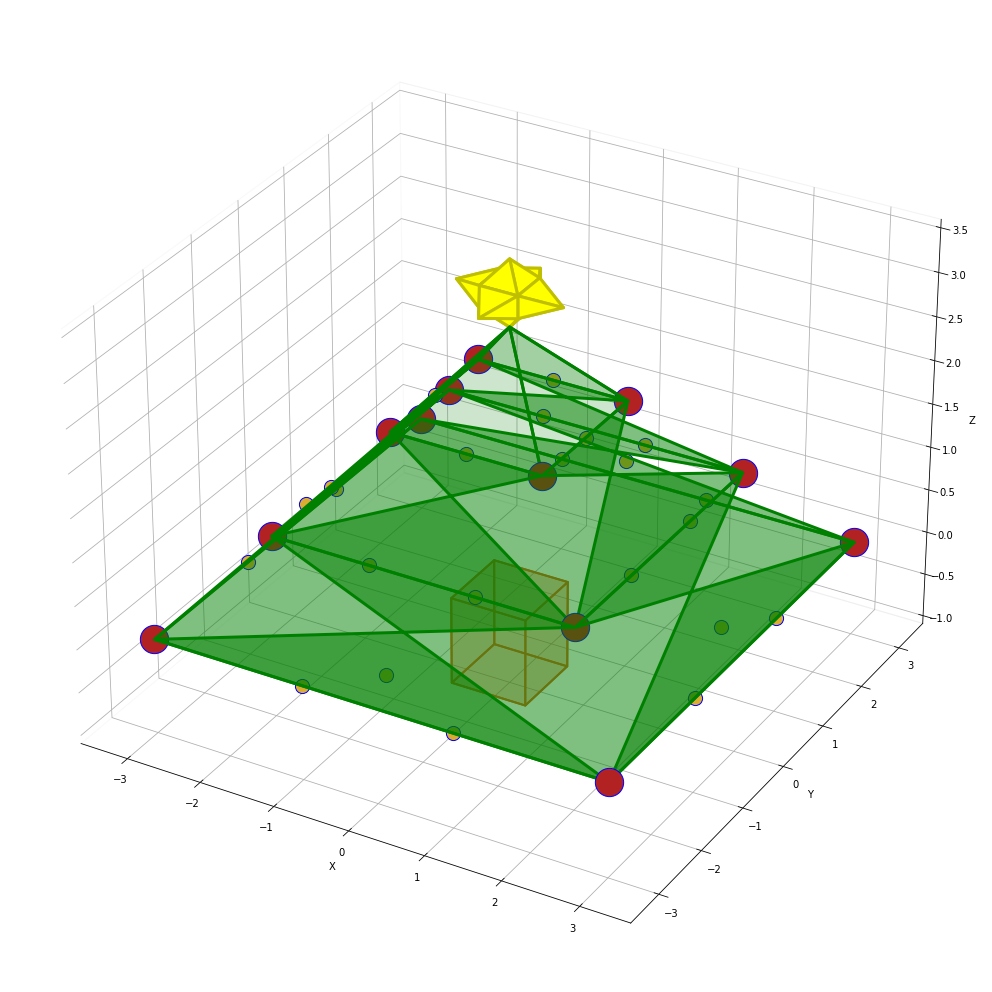

In [24]:
# Crear la Figura para el Tronco Inferior
fig = plt.figure(figsize=(18, 18))

# Añadir el Eje Z
ax = fig.add_subplot(111, projection='3d')

# Establecer el color de fondo del gráfico
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.fill = False

# Límites de los Ejes Coordenados
ax.set_xlim([-3.5, 3.5])
ax.set_ylim([-3.5, 3.5])
ax.set_zlim([-1, 3.5])

# Etiquetas de los Ejes Coordenados
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Dibujo y Unión de las Partes del Árbol

## Hojas del Árbol
ax.add_collection3d(Poly3DCollection(caras_inferiores, facecolors='green', linewidths=3, edgecolors='g', alpha=0.5))
ax.add_collection3d(Poly3DCollection(caras_medias, facecolors='green', linewidths=3, edgecolors='g', alpha=0.5))
ax.add_collection3d(Poly3DCollection(caras_superiores, facecolors='green', linewidths=3, edgecolors='g', alpha=0.2))

## Bolas rojas en las esquinas
corner_coords = [
    [3,3,0], [3,-3,0], [-3,-3,0], [-3,3,0],  # Base
    [2,2,1], [2,-2,1], [-2,-2,1], [-2,2,1],  # Nivel medio
    [1,1,2], [1,-1,2], [-1,-1,2], [-1,1,2]   # Nivel superior
]
for coord in corner_coords:
    ax.scatter(*coord, color='#B22222', s=800, edgecolors='b')

## Decoraciones doradas
decor_coords = [
    [0,2.8,0.3], [2.8,0,0.3], [0,-2.8,0.3], [-2.8,0,0.3],
    [3,1,0], [3,-1,0], [-3,1,0], [-3,-1,0],
    [1,-3,0], [1,3,0], [-1,3,0], [-1,-3,0],
    [2,0.7,1], [2,-0.7,1], [-2,-0.7,1], [-2,0.7,1],
    [0.7,2,1], [0.7,-2,1], [-0.7,-2,1], [-0.7,2,1],
    [0,1,2], [0,-1,2], [1,0,2], [-1,0,2]
]
for coord in decor_coords:
    ax.scatter(*coord, color='#DBAc34', s=200, edgecolors='b')
        
# Elementos de la Estrella
ax.add_collection3d(Poly3DCollection(estrella_inferior, facecolors='yellow', linewidths=3, edgecolors='y', alpha=1))
ax.add_collection3d(Poly3DCollection(estrella_central, facecolors='yellow', linewidths=3, edgecolors='y', alpha=0.2))
ax.add_collection3d(Poly3DCollection(estrella_superior, facecolors='yellow', linewidths=3, edgecolors='y', alpha=1))
ax.add_collection3d(Poly3DCollection(estrella_derecha, facecolors='yellow', linewidths=3, edgecolors='y', alpha=1))
ax.add_collection3d(Poly3DCollection(estrella_izquierda, facecolors='yellow', linewidths=3, edgecolors='y', alpha=1))
ax.add_collection3d(Poly3DCollection(estrella_frontal, facecolors='yellow', linewidths=3, edgecolors='y', alpha=1))
ax.add_collection3d(Poly3DCollection(estrella_posterior, facecolors='yellow', linewidths=3, edgecolors='y', alpha=1))

# Tronco del Árbol
ax.add_collection3d(Poly3DCollection(tronco_central, facecolors='chocolate', linewidths=2, edgecolors='chocolate', alpha=0.2))

### Paso 3: Animar el árbol

In [25]:
def animate(i):
    ax.view_init(elev=10., azim=i)
    return fig,

anim = animation.FuncAnimation(fig, animate,frames=360, interval=20, blit=True)

HTML(anim.to_html5_video())

In [26]:
# Guardar la animación
anim.save('3d_christmas_tree.mp4', fps=30, extra_args=['-vcodec', 'libx264'])